<a href="https://colab.research.google.com/github/Bae-hong-seob/University-3-2/blob/main/Big_data_process_and_application/homework1/2018204042_%EB%B0%B0%ED%99%8D%EC%84%AD_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 47 kB/s 
     |████████████████████████████████| 199 kB 25.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845514 sha256=dd6d397e00c14fe468018e1e0d5c1d9afea11f246f38cea235736b0938b1645f
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [ ]:
!pip install graphframes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 15.4 MB/s 


In [ ]:
!curl -L -o "/usr/local/lib/python3.6/dist-packages/pyspark/jars/graphframes- 0.8.2-spark3.2-s_2.12.jar" http://dl.bintray.com/spark- packages/maven/graphframes/graphframes/0.8.2-spark3.2-s_2.12/graphframes- 0.8.2-spark3.2-s_2.12.jar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (52) Empty reply from server
curl: (6) Could not resolve host: packages
curl: (6) Could not resolve host: 0.8.2-spark3.2-s_2.12.jar


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq

Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading database ... 123942 files and directories currently installed.)
Preparing to unpack .../openjdk-8-jre-headless_8u352-ga-1~18.04_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u352-ga-1~18.04) ...
Selecting previously unselected package openjdk-8-jdk-headless:amd64.
Preparing to unpack .../openjdk-8-jdk-headless_8u352-ga-1~18.04_amd64.deb ...
Unpacking openjdk-8-jdk-headless:amd64 (8u352-ga-1~18.04) ...
Setting up openjdk-8-jre-headless:amd64 (8u352-ga-1~18.04) ...
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/orbd to provide /usr/bin/orbd (orbd) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/servertool to provide /usr/bin/servertool (servertool) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/tnameserv to provide /usr/bin/tnameserv (tnameserv) in auto mode
Setting up openjdk-8-jdk-headless:amd64 (8u352-ga-1~18

In [ ]:
import pyspark
from pyspark.sql import *
import pyspark.sql.functions as F
from pyspark import SparkContext, SparkConf
from pyspark.sql.types import *
from graphframes import *
import pandas as pd

In [ ]:
spark = SparkSession.builder.master("local[*]").config("spark.jars.packages", "graphframes:graphframes:0.8.2-spark3.2-s_2.12").getOrCreate()

#1.Data load 및 전처리

In [ ]:
co = pd.read_csv('/content/drive/MyDrive/3-2 university/Big_data_process_and_application/homework1/USA-road-d.NY.co')
subtract = co[6:]

subtract['id'] = subtract['c 9th DIMACS Implementation Challenge: Shortest Paths'].apply(lambda x : x.split(' ')[1])
subtract['latitude'] = subtract['c 9th DIMACS Implementation Challenge: Shortest Paths'].apply(lambda x : x.split(' ')[2])
subtract['longitude'] = subtract['c 9th DIMACS Implementation Challenge: Shortest Paths'].apply(lambda x : x.split(' ')[3])

position = pd.DataFrame({'id':subtract['id'],
                             'latitude':subtract['latitude'],
                             'longitude':subtract['longitude']}).reset_index(drop = True)

position = position.astype({'latitude':'float'})
position = position.astype({'longitude':'float'})

position

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,id,latitude,longitude
0,1,-73530767.0,41085396.0
1,2,-73530538.0,41086098.0
2,3,-73519366.0,41048796.0
3,4,-73519377.0,41048654.0
4,5,-73524567.0,41093796.0
...,...,...,...
264341,264342,-73532027.0,41193370.0
264342,264343,-73709010.0,40957343.0
264343,264344,-73820681.0,40994683.0
264344,264345,-73714376.0,41004205.0


In [ ]:
position.dtypes

id            object
latitude     float64
longitude    float64
dtype: object

In [ ]:
gr = pd.read_csv('/content/drive/MyDrive/3-2 university/Big_data_process_and_application/homework1/USA-road-d.NY.gr')
subtract2 = gr[6:]

subtract2['start_node_id'] = subtract2['c 9th DIMACS Implementation Challenge: Shortest Paths'].apply(lambda x : x.split(' ')[1])
subtract2['end_node_id'] = subtract2['c 9th DIMACS Implementation Challenge: Shortest Paths'].apply(lambda x : x.split(' ')[2])
subtract2['weights'] = subtract2['c 9th DIMACS Implementation Challenge: Shortest Paths'].apply(lambda x : x.split(' ')[3])

relations = pd.DataFrame({'src':subtract2['start_node_id'],
                             'dst':subtract2['end_node_id'],
                             'weights':subtract2['weights']}).reset_index(drop = True)

relations = relations.astype({'weights':'float'})

relations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,src,dst,weights
0,1,2,803.0
1,2,1,803.0
2,3,4,158.0
3,4,3,158.0
4,5,6,774.0
...,...,...,...
733841,239390,239392,1557.0
733842,263466,263813,106.0
733843,263813,263466,106.0
733844,261228,259707,389.0


In [ ]:
relations.dtypes

src         object
dst         object
weights    float64
dtype: object

#2.Spark DataFrame 생성

In [ ]:
spark_position = spark.createDataFrame(position)
spark_position.show()

+---+------------+-----------+
| id|    latitude|  longitude|
+---+------------+-----------+
|  1|-7.3530767E7|4.1085396E7|
|  2|-7.3530538E7|4.1086098E7|
|  3|-7.3519366E7|4.1048796E7|
|  4|-7.3519377E7|4.1048654E7|
|  5|-7.3524567E7|4.1093796E7|
|  6| -7.352549E7|4.1093834E7|
|  7|-7.3531927E7|4.1110484E7|
|  8|-7.3530106E7|4.1110611E7|
|  9|-7.3529341E7|4.1125895E7|
| 10|-7.3529746E7|4.1127369E7|
| 11|-7.3530583E7|4.1125051E7|
| 12|-7.3529763E7|4.1085358E7|
| 13|-7.3529834E7|4.1086062E7|
| 14|-7.3613384E7|4.1065086E7|
| 15|-7.3615019E7|4.1065131E7|
| 16|-7.3693133E7|4.1058075E7|
| 17|-7.3694273E7|4.1059296E7|
| 18| -7.351223E7|4.1287431E7|
| 19|-7.3511896E7|4.1286556E7|
| 20|-7.3501634E7|4.1286067E7|
+---+------------+-----------+
only showing top 20 rows



In [ ]:
spark_relations = spark.createDataFrame(relations)
spark_relations.show()

+---+---+-------+
|src|dst|weights|
+---+---+-------+
|  1|  2|  803.0|
|  2|  1|  803.0|
|  3|  4|  158.0|
|  4|  3|  158.0|
|  5|  6|  774.0|
|  6|  5|  774.0|
|  7|  8| 1531.0|
|  8|  7| 1531.0|
|  9| 10| 1673.0|
| 10|  9| 1673.0|
|  9| 11| 1400.0|
| 11|  9| 1400.0|
|  1| 12|  842.0|
| 12|  1|  842.0|
|  2| 13|  591.0|
| 13|  2|  591.0|
| 14| 15| 1371.0|
| 15| 14| 1371.0|
| 16| 17| 1659.0|
| 17| 16| 1659.0|
+---+---+-------+
only showing top 20 rows



spark_position
- 각 node의 위도 경도 정보를 저장한 DataFrame.
- 위도, 경도 자료형은 float로 변환하여 저장함.  

spark_relations
- 각 node의 relation 정보를 저장한 DataFrame
- weight 자료형만 float로 저장함.

# 3. Graph 생성 및 시각화

In [ ]:
def create_transport_graph():
    node_fields = [
        StructField("id", StringType(), True),
        StructField("latitude", FloatType(), True),
        StructField("longitude", FloatType(), True),
    ]
    nodes = spark_position

    relationships = spark_relations

    return GraphFrame(nodes, relationships)

In [ ]:
g = create_transport_graph()

/usr/local/lib/python3.7/dist-packages/pyspark/sql/dataframe.py:149: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  "DataFrame.sql_ctx is an internal property, and will be removed "


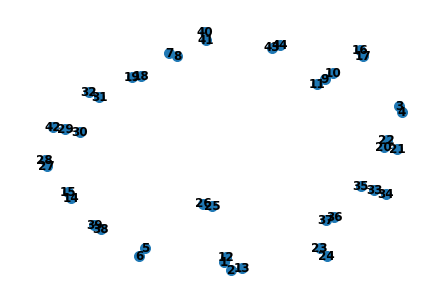

In [ ]:
import networkx as nx
from graphframes import GraphFrame
import matplotlib.pyplot as plt

def PlotGraph(edge_list):
    Gplot=nx.Graph()
    for row in edge_list.select('src','dst').take(50): #상위 50개로만 그래프 시각화 진행
        Gplot.add_edge(row['src'],row['dst'])

    #plt.subplot(121)
    nx.draw(Gplot, node_size=100,with_labels=True, font_weight='bold')


spark = SparkSession \
    .builder \
    .appName("PlotAPp") \
    .getOrCreate()

PlotGraph(g.edges)

#4. A* Algorithm 구현
  - CPU : 40분
  - GPU : 35분

1. 현재 노드에서 갈 수 있는 노드 모두 검색
  - 현재 노드 closed_list에 추가  
  closed_list 는 [[id, g],[id,g]] 의 2차원 리스트 구조
  - 현재 노드 closed_list에서 g_cost 불러오기

2. 갈 수 있는 노드 모두 f 계산 -> open list에 추가 (open list = 우선순위 queue, 즉 f값으로 정렬) 
  - linked list로 관리하기 위해 dictionary 구조를 활용. 
    - (id, (f, g)) 구조, 즉 key = id, value = (f,g) tuple 형태
  - 이때 갈 수 있는 노드 중 closed list에 있으면 반복문 x -> continue
  - 이때 갈 수 있는 노드 중 open list(즉 이전 방문값)에 있으면 f update or not 비교 
  - f update 시 g_cost도 new_g_cost로 update.   
(f 비교 시, 해당 node에 대해 h는 동일하므로 g가 작은것이니 g도 update 해야한다.)

3. f가 가장 낮은 node로 이동 -> open list에서 pop 하고 해당 node는 closed list로 이동
  - 2번 다시 실행, 현재 노드가 dst_index (=end point)일 때까지 반복.

4. dst_index 노드에 도착 시, closed_list에서 도착 node를 다시 시작점으로 src를 추적

5. 최종 경로 (final path) 출력.

In [ ]:
from queue import PriorityQueue
import operator

que = PriorityQueue()
#que.put((1, 'apple')) # (우선순위, 값)의 형태로 저장할 수도 있음
#que.get()[1] # (우선순위, 값)의 형태에서 값 반환

start_node = 1
dst_index = 10
open_dict = {}
open_list = []
closed_list = []
current_cost = 0

print("dst_index :",dst_index,'...')

#dst 는 node i, 다른 모든 노드와의 거리 계산(node j)
dst = spark_position.select('latitude', 'longitude').where(spark_position.id == str(dst_index)).collect()[0]
x0 = dst[0]
y0 = dst[1]
print('dst latitude : ',x0)
print('dst longitude : ',y0)

dst_index : 10 ...
dst latitude :  -73529746.0
dst longitude :  41127369.0


In [ ]:
from pandas._libs.algos import Infinity
import math

def star_a_algorithm(current_node,current_cost,open_list,open_dict,closed_list):
  closed_list.append([current_node,current_cost]) #closed_list 에는 id 값만 존재(int)
  print('closed_list : ',closed_list)

  # 현재 노드에서 갈 수 있는 노드 모두 검색
  from_expr = "id = "+str(current_node)
  to_expr = "id <> "+str(current_node)
  result = g.bfs(from_expr,to_expr) # id = 1 인 root node에서 id != 1 인 모든 node를 탐색.
  print(result.columns)

  columns = [columns for columns in result.columns]
  result.select(columns).show()

  num_of_nodes = len(result.select('to').collect())
  result_df = result.head(num_of_nodes)
  
  for j in range(num_of_nodes):

    print("visit node",result_df[j][2][0],'...')

    closed_id_list = [i[0] for i in closed_list]
    #closed_list에 존재 시 continue
    if int(result_df[j][2][0]) in closed_id_list:
      continue

    #closed_list에 없을 경우 f 계산

    #g계산

    #현재 node의 g 값을 불러와야한다. g는 closed_list에 저장되어 있다. ([id,g_cost])
    for i in closed_list:
      if i[0] == current_node:
        current_cost = i[1]
        break;
    print('-----current_cost : ',current_cost)

    #weight를 바탕으로 new_g_cost 각각 계산
    weight = result_df[j][1][2]
    new_g_cost = current_cost + weight
    print('-----weight : ',weight)
    print('-----new g_cost : ',new_g_cost)

    # 추정 잔여거리(distance 계산)
    x1 = result_df[j][2][1]
    y1 = result_df[j][2][2]

    #h계산 - 두 점 사이의 거리
    h = math.sqrt(pow((x0-x1),2) + pow((y0-y1),2))
    print('-----L2 distance : ',h)

    #f계산 -> open_dict에 추가 or (update or not)
    f = new_g_cost + h

    if result_df[j][2][0] in open_dict:
      print('compared old_f vs new_f ...')
      #open_dict(id : (f,g)) 에서 해당 id의 f 값을 찾아

      if open_dict[result_df[j][2][0]][0] > f: #update
        open_dict[result_df[j][2][0]] = (f, new_g_cost) # 같은 id 에 대해 경로에 따라 f 가 다르다면 h 가 같기 때문에 g 차이 이다. 따라서 g를 update
      else:
        print('no update')
        
    else: #해당 노드가 open_dict에 없는 경우 open_dict에 추가.
      open_dict[result_df[j][2][0]] = (f,new_g_cost)

  #open_list는 f 값으로 정렬.
  open_list = sorted(open_dict.items(),key=operator.itemgetter(1))

  if len(open_list) == 0:
    print('-----------------------------------')
    print('no path')


  print('----open_list : ',open_list)

  min = open_list.pop(0)
  del(open_dict[min[0]])
  print('----open_list : ',open_list)
  print('\n')
  current_node = int(min[0])
  current_cost = min[1][1]

  return current_node, current_cost, open_list, open_dict, closed_list

In [ ]:
current_node, current_cost, open_list,open_dict,closed_list = star_a_algorithm(start_node,current_cost,open_list,open_dict,closed_list)
current_node

while(current_node != dst_index):
  current_node, current_cost, open_list,open_dict,closed_list = star_a_algorithm(current_node,current_cost,open_list,open_dict,closed_list)

closed_list :  [[1, 0]]


/usr/local/lib/python3.7/dist-packages/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


['from', 'e0', 'to']
+--------------------+-----------------+--------------------+
|                from|               e0|                  to|
+--------------------+-----------------+--------------------+
|{1, -7.3530767E7,...|   {1, 12, 842.0}|{12, -7.3529763E7...|
|{1, -7.3530767E7,...|{1, 1363, 2428.0}|{1363, -7.3531567...|
|{1, -7.3530767E7,...|    {1, 2, 803.0}|{2, -7.3530538E7,...|
+--------------------+-----------------+--------------------+

visit node 12 ...
-----current_cost :  0
-----weight :  842.0
-----new g_cost :  842.0
-----L2 distance :  42011.00343957521
visit node 1363 ...
-----current_cost :  0
-----weight :  2428.0
-----new g_cost :  2428.0
-----L2 distance :  44110.60382719783
visit node 2 ...
-----current_cost :  0
-----weight :  803.0
-----new g_cost :  803.0
-----L2 distance :  41278.59863173652
----open_list :  [('2', (42081.59863173652, 803.0)), ('12', (42853.00343957521, 842.0)), ('1363', (46538.60382719783, 2428.0))]
----open_list :  [('12', (42853.003439

In [ ]:
closed_list.append([current_node, current_cost])

In [ ]:
closed_list

[[1, 0],
 [2, 803.0],
 [48, 1420.0],
 [13, 1394.0],
 [12, 842.0],
 [1363, 2428.0],
 [1364, 3523.0],
 [1358, 3606.0],
 [1365, 5264.0],
 [1355, 5433.0],
 [1274, 6544.0],
 [1366, 4038.0],
 [1183, 7648.0],
 [1181, 8730.0],
 [1369, 4373.0],
 [1182, 10698.0],
 [1403, 6376.0],
 [1179, 14661.0],
 [1360, 6791.0],
 [1177, 16537.0],
 [1353, 8539.0],
 [1401, 8276.0],
 [1354, 6381.0],
 [1176, 18148.0],
 [1361, 8823.0],
 [1178, 18728.0],
 [1357, 4495.0],
 [1275, 7264.0],
 [1218, 10103.0],
 [1154, 20634.0],
 [1143, 8699.0],
 [1359, 4733.0],
 [1216, 13132.0],
 [1362, 7243.0],
 [1144, 10113.0],
 [1153, 24999.0],
 [1186, 12637.0],
 [1136, 11367.0],
 [1203, 16065.0],
 [1202, 17493.0],
 [1215, 14269.0],
 [1174, 18488.0],
 [1356, 5524.0],
 [1141, 12711.0],
 [1201, 18337.0],
 [1180, 20004.0],
 [1200, 19013.0],
 [1220, 10935.0],
 [1195, 20076.0],
 [1072, 30190.0],
 [1272, 8269.0],
 [1190, 21190.0],
 [1142, 11964.0],
 [1189, 22204.0],
 [1223, 11197.0],
 [1172, 20393.0],
 [1148, 31986.0],
 [1188, 22424.0],
 [1

#5. 경로 추적(path 구하기)

In [ ]:
path = []
trace_back_index = current_node

while(trace_back_index != start_node):
  print('trace_back start !!!')
  print('-----current_index : ',trace_back_index)
  #현재 node 를 path에 추가
  path.append(trace_back_index)

  # 현재 노드에서 갈 수 있는 노드 모두 검색
  from_expr = "id = "+str(trace_back_index)
  to_expr = "id <> "+str(trace_back_index)
  result = g.bfs(from_expr,to_expr) # id = 1 인 root node에서 id != 1 인 모든 node를 탐색.

  num_of_nodes = len(result.select('to').collect())
  result_df = result.head(num_of_nodes)

  trace_back_list = []
  for i in result_df:
    trace_back_list.append(i[2][0])
  print('-----track_back_list : ',trace_back_list)


  # 현재 노드에서 역추적 시, 갈 수 있는 node 중 closed_list에 있는 node를 탐색.
  find_break = False
  for i in closed_list:
    for j in trace_back_list:
      if int(j) == i[0]: #i[0] 은 closed_list에 있는 id값
        trace_back_index = int(j)
        find_break = True
        break

    if find_break == True:
      break

  print('current_path', path)
  print('\n')

trace_back start !!!
-----current_index :  10
-----track_back_list :  ['6444', '1197', '9']
current_path [10]


trace_back start !!!
-----current_index :  9
-----track_back_list :  ['11', '10', '603']
current_path [10, 9]


trace_back start !!!
-----current_index :  603
-----track_back_list :  ['594', '604', '9']
current_path [10, 9, 603]


trace_back start !!!
-----current_index :  594
-----track_back_list :  ['595', '588', '603']
current_path [10, 9, 603, 594]


trace_back start !!!
-----current_index :  588
-----track_back_list :  ['594', '589', '592']
current_path [10, 9, 603, 594, 588]


trace_back start !!!
-----current_index :  592
-----track_back_list :  ['588', '590', '593']
current_path [10, 9, 603, 594, 588, 592]


trace_back start !!!
-----current_index :  590
-----track_back_list :  ['591', '579', '592']
current_path [10, 9, 603, 594, 588, 592, 590]


trace_back start !!!
-----current_index :  591
-----track_back_list :  ['579', '587', '590']
current_path [10, 9, 603, 594,

In [ ]:
path.append(start_node)
path

[10,
 9,
 603,
 594,
 588,
 592,
 590,
 591,
 587,
 586,
 596,
 598,
 1147,
 7,
 1148,
 1072,
 1153,
 1154,
 1178,
 1176,
 1177,
 1179,
 1182,
 1181,
 1183,
 1274,
 1355,
 1358,
 1363,
 1]

In [ ]:
final_path = []

for i in range(len(path)):
  final_path.append(path.pop())

final_path

[1,
 1363,
 1358,
 1355,
 1274,
 1183,
 1181,
 1182,
 1179,
 1177,
 1176,
 1178,
 1154,
 1153,
 1072,
 1148,
 7,
 1147,
 598,
 596,
 586,
 587,
 591,
 590,
 592,
 588,
 594,
 603,
 9,
 10]